In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision

In [72]:
def show_images(imgs, nrows, ncols, titles=None, scale=1.5):
    figsize = (ncols * scale, nrows * scale)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, (img, ax) in enumerate(zip(imgs, axes)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles is not None:
            ax.set_title(titles[i])
    return axes

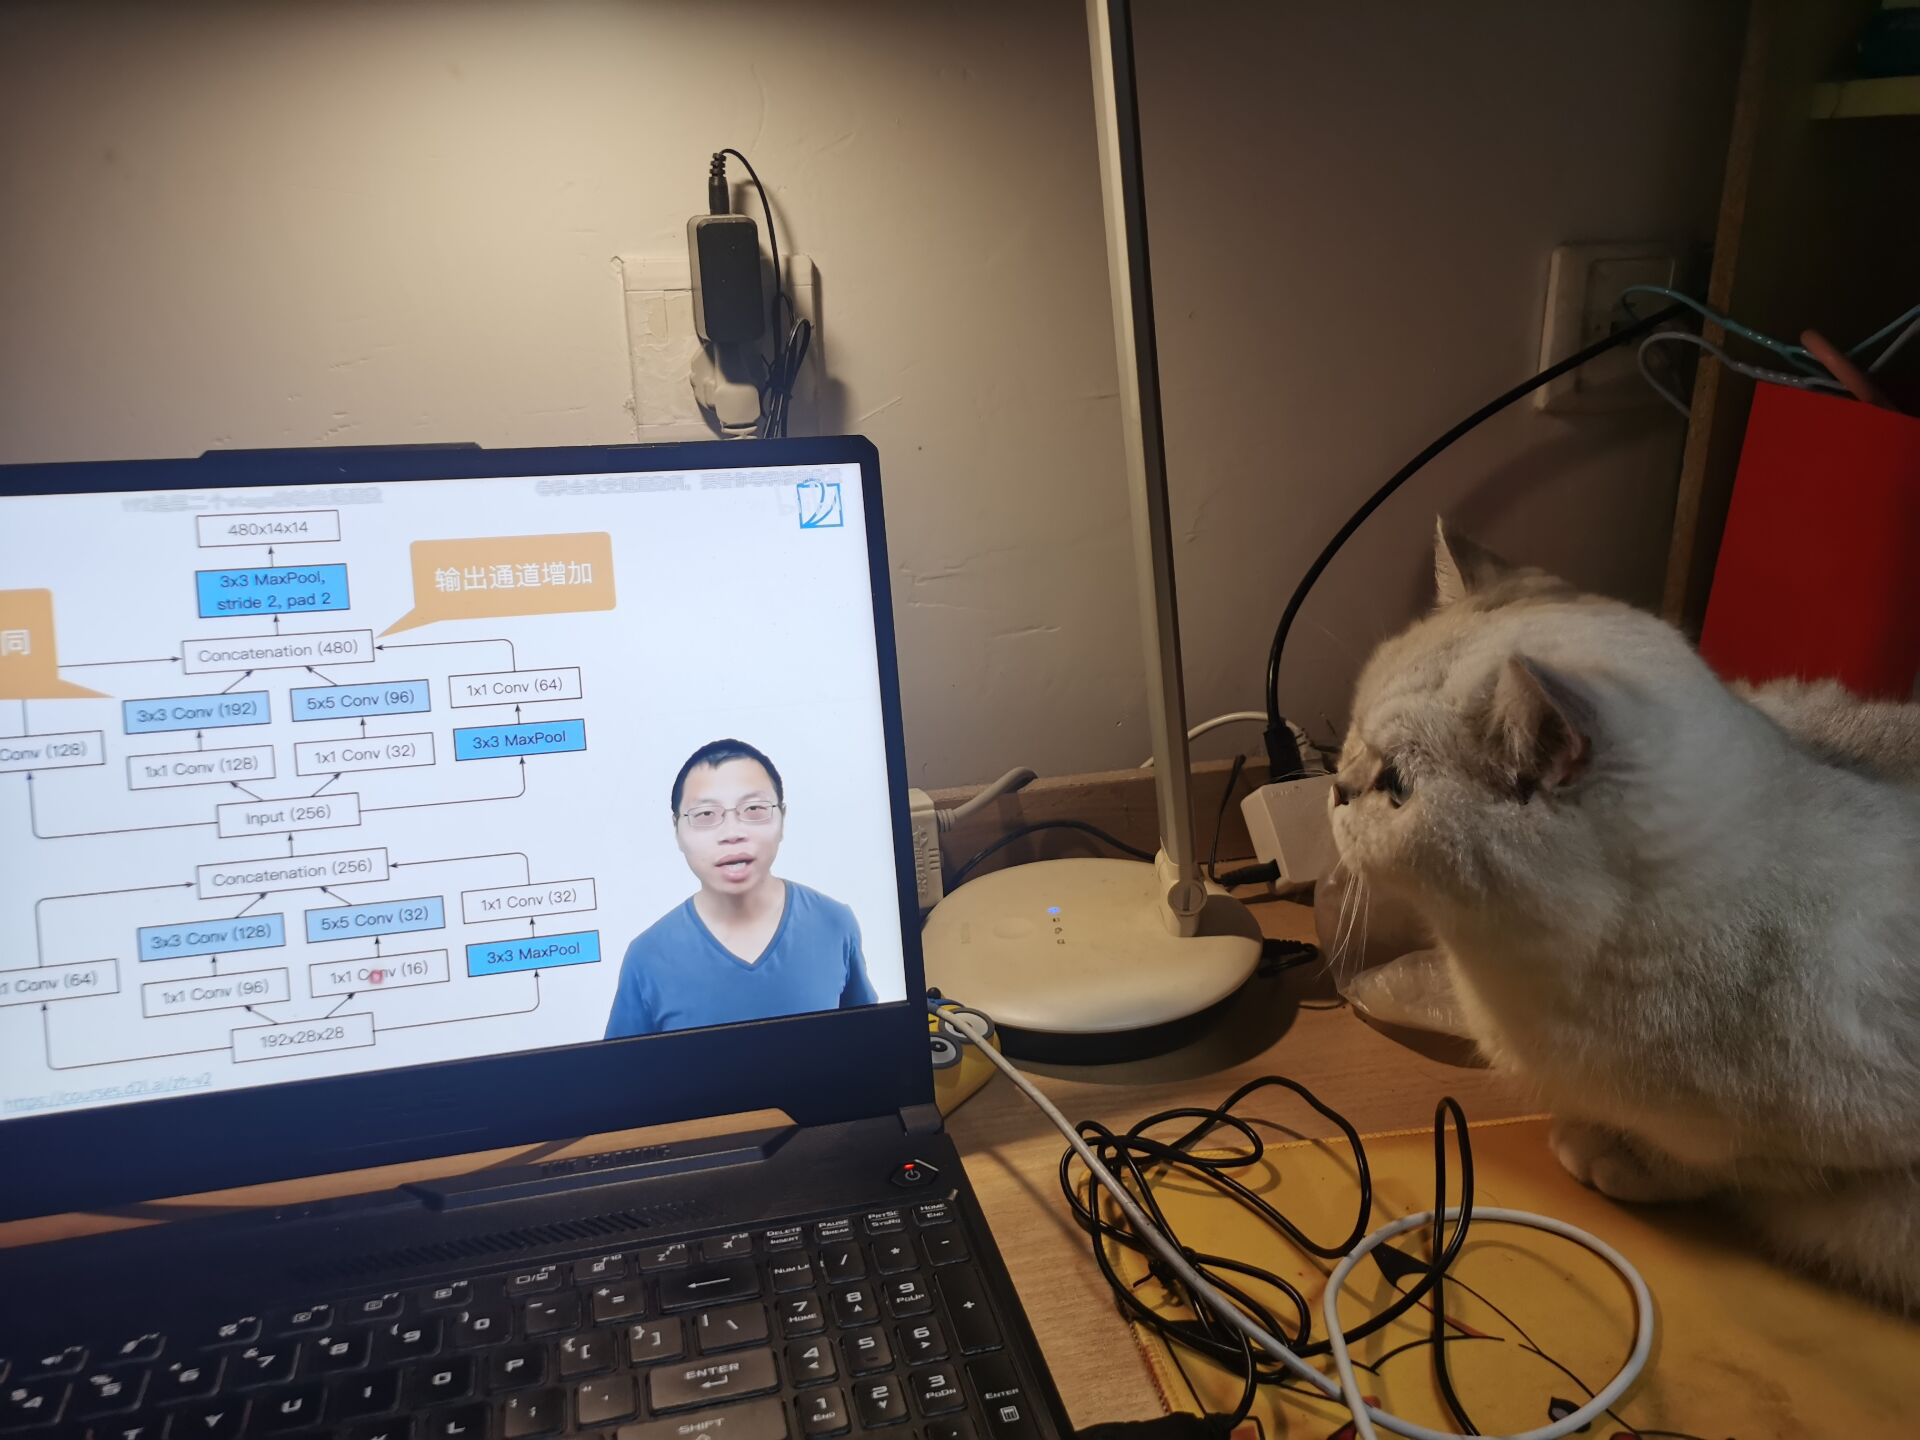

In [73]:
img_path = "../img/cat.jpg"
img = Image.open(img_path)
img.show()

In [74]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale=scale)

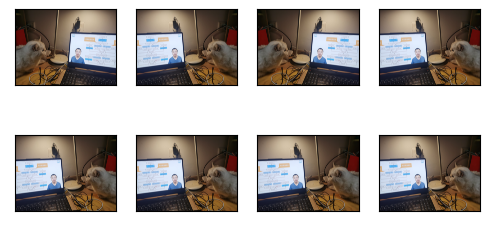

In [75]:
apply(img, torchvision.transforms.RandomHorizontalFlip())  # 水平翻转

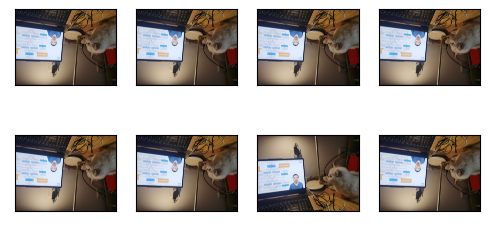

In [76]:
apply(img, torchvision.transforms.RandomVerticalFlip())  # 垂直翻转

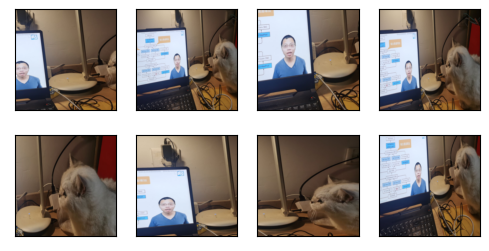

In [77]:
# 随机裁剪并固定大小，scale表示裁取原始图像的百分比，ratio表示高宽比
shape_aug = torchvision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

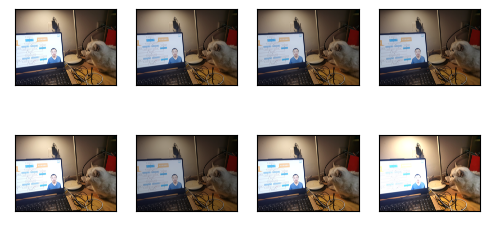

In [78]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))  # 改变亮度

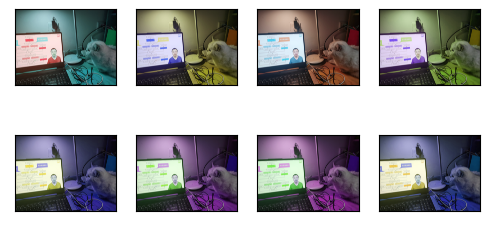

In [79]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))  # 改变色调

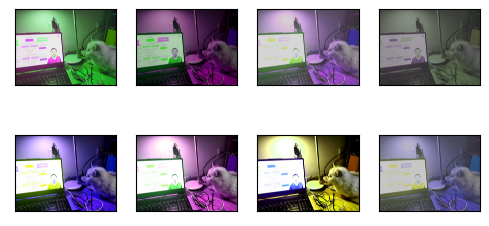

In [80]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)  # contrast是对比度，saturation是饱和度

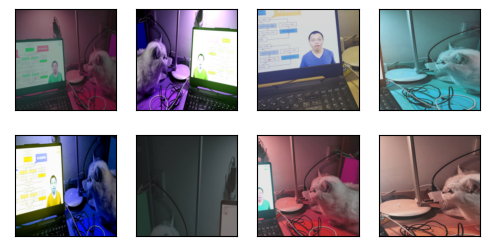

In [81]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)  # 多种方式组合使用